In [19]:
from common import SparseGraph

In [20]:
class PQ:
    # priority queue
    
    def __init__(self):
        self.A = []
        self.N = 0
    
    def isEmpty(self):
        return self.N == 0
    
    def key(self, k):
        return self.A[k][1]
    
    def swim(self, k):
        A = self.A

        while k > 0:
            p = (k - 1) // 2
            if self.key(p) <= self.key(k):
                break
            
            A[p], A[k] = A[k], A[p]
            k = p        
        
    def sink(self, k):
        A = self.A
        N = self.N
        
        while k * 2 + 1 < N:
            p = k
            
            if self.key(k) > self.key(k * 2 + 1):
                p = k * 2 + 1
                
            if k * 2 + 2 < N and self.key(p) > self.key(k * 2 + 2):
                p = k * 2 + 2
            
            if p == k:
                break
            
            A[k], A[p] = A[p], A[k]
            k = p            
        
    def getMin(self):
        if self.N == 0:
            raise Exception('PQ is empty')
        
        x = self.A[0]
        
        self.A[0] = self.A[self.N - 1]
        self.N -= 1

        self.sink(0)
        
        return x
    
    def insert(self, v, weight):
        self.A.append([v, weight])
        self.N += 1
        
        self.swim(self.N - 1)
    
    def decreaseKey(self, v, weight):
        index = -1
        for k in range(self.N):
            if v == self.A[k][0]:
                index = k
                break
            
        if index < 0:
            return
        
        original_weight = self.A[k][1]
        self.A[k][1] = weight
        
        if original_weight > weight:
            self.swim(k)
        elif original_weight < weight:
            self.sink(k)

In [21]:
pq = PQ()
pq.insert(0, 10)
pq.insert(1, 4)
pq.insert(2, 3)
pq.insert(3, 6)
pq.insert(4, 2)
pq.insert(5, 6)

print (pq.A)
print (pq.N)

pq.decreaseKey(3, 1)
print (pq.A)
print (pq.N)

x = pq.getMin()
print (x)

print (pq.A)
print (pq.N)


[[4, 2], [2, 3], [1, 4], [0, 10], [3, 6], [5, 6]]
6
[[3, 1], [4, 2], [1, 4], [0, 10], [2, 3], [5, 6]]
6
[3, 1]
[[4, 2], [2, 3], [1, 4], [0, 10], [5, 6], [5, 6]]
5


In [22]:
class SsspContext:
    
    MAX_DISTANCE = 99999999999999999
    
    def __init__(self, g):
        self.pred = {} # 前驱结点
        self.distance ={} # 距离
        self.pq = PQ()
        
        for k in g.V:
            v = g.V[k]            
            self.pred[v.v] = -1
            self.distance[v.v] = self.MAX_DISTANCE
        
    def __str__(self):
        s = '{\n'
        s += '    pred = %s\n' % str(self.pred)
        s += '    distance = %s\n' % str(self.distance)
        s += '}\n'
        
        return s

    
class SsspGraph(SparseGraph):
    
    def __init__(self):
        super(SsspGraph, self).__init__()
        
    def singleSourceShortest(self, s):
        s = self.findV(s)
        if s is None:
            return None
        
        context = SsspContext(self)
        context.distance[s.v] = 0
        pq = context.pq
        
        for k in self.V:
            v = self.V[k]
            pq.insert(v.v, context.distance[v.v])
        
        while not pq.isEmpty():
            u = pq.getMin()
            u = self.findV(u[0])
            
            v = u.next
            while v is not None:
                w = v.weight

                newLen = context.distance[u.v] + w
                
                if newLen < context.distance[v.v]:
                    pq.decreaseKey(v.v, newLen)
                    context.distance[v.v] = newLen
                    context.pred[v.v] = u.v
                
                v = v.next
            
        return context

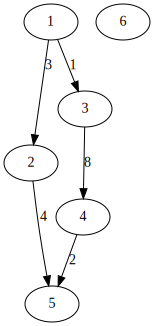

In [23]:
g = SsspGraph()
g.addV(1)
g.addV(2)
g.addV(3)
g.addV(4)
g.addV(5)
g.addV(6)

g.addE(1, 2, 3)
g.addE(1, 3, 1)
g.addE(3, 4, 8)
g.addE(4, 5, 2)
g.addE(2, 5, 4)

g.draw(True, True)

In [24]:
s = 1
context = g.singleSourceShortest(s)
print ('the shortest path from ' + str(s) + " is:")
print (context)

the shortest path from 1 is:
{
    pred = {1: -1, 2: 1, 3: 1, 4: 3, 5: 2, 6: -1}
    distance = {1: 0, 2: 3, 3: 1, 4: 9, 5: 7, 6: 99999999999999999}
}

